### House Prices: Advanced Regression Techniques

### Table of contents:

- [Objective](#ob)

- [Importing data](#id)

- [Descriptive Statistics](#dd)

- [Data cleaning](#dc)
    - Datatype conversion
    - Handling missing values
    - Log transformation
    - Standardization

- [Algorithm Selection](#as)
    - Ridge
    - Lasso
    - Elastic Net

- [Observations & Conclusions](#oc)

### Objective <a name='ob'></a>

**Goal of the study is to create a model that predicts sale prices of house using Advanced Regression Techniques**<br/>

**Attribute description**<br/>
Here's a brief version of what you'll find in the data description file.<br/>

---
SalePrice - the property's sale price in dollars. **This is the target variable** that you're trying to predict.<br/>
MSSubClass: The building class<br/>
MSZoning: The general zoning classification<br/>
LotFrontage: Linear feet of street connected to property<br/>
LotArea: Lot size in square feet<br/>
Street: Type of road access<br/>
Alley: Type of alley access<br/>
LotShape: General shape of property<br/>
LandContour: Flatness of the property<br/>
Utilities: Type of utilities available<br/>
LotConfig: Lot configuration<br/>
LandSlope: Slope of property<br/>
Neighborhood: Physical locations within Ames city limits<br/>
Condition1: Proximity to main road or railroad<br/>
Condition2: Proximity to main road or railroad (if a second is present)<br/>
BldgType: Type of dwelling<br/>
HouseStyle: Style of dwelling<br/>
OverallQual: Overall material and finish quality<br/>
OverallCond: Overall condition rating<br/>
YearBuilt: Original construction date<br/>
YearRemodAdd: Remodel date<br/>
RoofStyle: Type of roof<br/>
RoofMatl: Roof material<br/>
Exterior1st: Exterior covering on house<br/>
Exterior2nd: Exterior covering on house (if more than one material)<br/>
MasVnrType: Masonry veneer type<br/>
MasVnrArea: Masonry veneer area in square feet<br/>
ExterQual: Exterior material quality<br/>
ExterCond: Present condition of the material on the exterior<br/>
Foundation: Type of foundation<br/>
BsmtQual: Height of the basement<br/>
BsmtCond: General condition of the basement<br/>
BsmtExposure: Walkout or garden level basement walls<br/>
BsmtFinType1: Quality of basement finished area<br/>
BsmtFinSF1: Type 1 finished square feet<br/>
BsmtFinType2: Quality of second finished area (if present)<br/>
BsmtFinSF2: Type 2 finished square feet<br/>
BsmtUnfSF: Unfinished square feet of basement area<br/>
TotalBsmtSF: Total square feet of basement area<br/>
Heating: Type of heating<br/>
HeatingQC: Heating quality and condition<br/>
CentralAir: Central air conditioning<br/>
Electrical: Electrical system<br/>
1stFlrSF: First Floor square feet<br/>
2ndFlrSF: Second floor square feet<br/>
LowQualFinSF: Low quality finished square feet (all floors)<br/>
GrLivArea: Above grade (ground) living area square feet<br/>
BsmtFullBath: Basement full bathrooms<br/>
BsmtHalfBath: Basement half bathrooms<br/>
FullBath: Full bathrooms above grade<br/>
HalfBath: Half baths above grade<br/>
Bedroom: Number of bedrooms above basement level<br/>
Kitchen: Number of kitchens<br/>
KitchenQual: Kitchen quality<br/>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br/>
Functional: Home functionality rating<br/>
Fireplaces: Number of fireplaces<br/>
FireplaceQu: Fireplace quality<br/>
GarageType: Garage location<br/>
GarageYrBlt: Year garage was built<br/>
GarageFinish: Interior finish of the garage<br/>
GarageCars: Size of garage in car capacity<br/>
GarageArea: Size of garage in square feet<br/>
GarageQual: Garage quality<br/>
GarageCond: Garage condition<br/>
PavedDrive: Paved driveway<br/>
WoodDeckSF: Wood deck area in square feet<br/>
OpenPorchSF: Open porch area in square feet<br/>
EnclosedPorch: Enclosed porch area in square feet<br/>
3SsnPorch: Three season porch area in square feet<br/>
ScreenPorch: Screen porch area in square feet<br/>
PoolArea: Pool area in square feet<br/>
PoolQC: Pool quality<br/>
Fence: Fence quality<br/>
MiscFeature: Miscellaneous feature not covered in other categories<br/>
MiscVal: $Value of miscellaneous feature <br/>
MoSold: Month Sold <br/>
YrSold: Year Sold <br/>
SaleType: Type of sale <br/>
SaleCondition: Condition of sale<br/>

### Importing data <a name='id'></a>

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Stats
from scipy.stats.stats import skew
from scipy.stats.stats import pearsonr

In [89]:
import os
print(os.getcwd())

E:\Tech UpX\Lasso Ridge


In [90]:
data = pd.read_csv('train.csv')

In [91]:
# What does the dataset look like?
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Top 3 Rows of the dataset

### Descriptive Statistics <a name='dd'></a>

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**Observations:** <br/>
No. of Rows: 1460 <br/>
No. of Columns: 81 <br/>

In [8]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Observations:** <br/>
There are missing values. <br/>
Range is very high.. Need to scale the data.<br/>
It seems like skewness is there in most of the columns. Need to investigate<br/>

### Data cleaning <a name='dc'></a>

**Unique value count and % of null values for each column**

In [9]:
# Count the uniques for each column for a given dataframe
def df_uniques(df):
    print('Col name,', 'Number of nulls,', 'Number of unique values', '% of nulls')
    list_of_features = []
    for col in df:
        l = [col, df[col].shape[0] - df[col].count(), df[col].unique().shape[0], '%.3f' %((df[col].shape[0] - df[col].count()) / df[col].shape[0])]
        list_of_features.append(l)
    # Sort by the number of NULLs: 
    list_of_features = sorted(list_of_features, key = lambda x: x[1], reverse = True)
    return list_of_features

df_uniques(data)

Col name, Number of nulls, Number of unique values % of nulls


[['PoolQC', 1453, 4, '0.995'],
 ['MiscFeature', 1406, 5, '0.963'],
 ['Alley', 1369, 3, '0.938'],
 ['Fence', 1179, 5, '0.808'],
 ['FireplaceQu', 690, 6, '0.473'],
 ['LotFrontage', 259, 111, '0.177'],
 ['GarageType', 81, 7, '0.055'],
 ['GarageYrBlt', 81, 98, '0.055'],
 ['GarageFinish', 81, 4, '0.055'],
 ['GarageQual', 81, 6, '0.055'],
 ['GarageCond', 81, 6, '0.055'],
 ['BsmtExposure', 38, 5, '0.026'],
 ['BsmtFinType2', 38, 7, '0.026'],
 ['BsmtQual', 37, 5, '0.025'],
 ['BsmtCond', 37, 5, '0.025'],
 ['BsmtFinType1', 37, 7, '0.025'],
 ['MasVnrType', 8, 5, '0.005'],
 ['MasVnrArea', 8, 328, '0.005'],
 ['Electrical', 1, 6, '0.001'],
 ['Id', 0, 1460, '0.000'],
 ['MSSubClass', 0, 15, '0.000'],
 ['MSZoning', 0, 5, '0.000'],
 ['LotArea', 0, 1073, '0.000'],
 ['Street', 0, 2, '0.000'],
 ['LotShape', 0, 4, '0.000'],
 ['LandContour', 0, 4, '0.000'],
 ['Utilities', 0, 2, '0.000'],
 ['LotConfig', 0, 5, '0.000'],
 ['LandSlope', 0, 3, '0.000'],
 ['Neighborhood', 0, 25, '0.000'],
 ['Condition1', 0, 9, '0.0

**Observations:**<br/>
The following features have a crazy number of nulls **PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage** <br/>
By looking at this, NAs are not necessarily a problem - but "NA" or null is misleading the data, so let's replace them<br/>
Alley: NA = no alley -> replace with "None"<br/>
MiscFeature: other features (e.g. tennis court) - NA = no other feature -> replace with "None"<br/>
Fence: NA = no fence -> replace with "None"<br/>
FireplaceQu: -> replace with "None"<br/>

In [10]:
# Let's get a neat list of the null columns - need to combine both datasets for this
null_columns = [col for col in data.columns if data[col].isnull().any()]
print(null_columns)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


The above mentioned is the list of null columns

**Lets replace null values for all the columns together**

In [11]:
# Define a function to replace nulls for many columns: 
def fill_nulls(df, col_list, na_val):
    for col in col_list:
        df[col].fillna(value = na_val, inplace = True)
    return df

In [12]:
# Categorical fields with an obvious meaning NA -> 'None'
nulls_to_none = ['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu', 'MasVnrType', 'BsmtCond', 
                 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 
                 'GarageQual', 'GarageCond', 'KitchenQual']
# Numerical fields with an obvious meaning NA -> 0
nulls_to_zero = ['LotFrontage', 'MasVnrArea', 'BsmtQual', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 
                 'BsmtHalfBath', 'BsmtUnfSF', 'GarageArea', 'GarageCars', 'TotalBsmtSF']

# Categorical fields with a less obvious interpretation - guessing that NA means 'None' (there are very few anyway)
nulls_to_zero_2 = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd']
nulls_to_other = ['SaleType', 'Functional']

# Apply to entire data:
for df in [data]: 
    fill_nulls(df, nulls_to_none, 'None')
    fill_nulls(df, nulls_to_zero, 0)
    fill_nulls(df, nulls_to_zero_2, 0)
    fill_nulls(df, nulls_to_other, 'Other')

In [13]:
# Print out data types
def data_types(df):
    for col in df:
        print(col, type(df[col][1]))   

In [14]:
data_types(data)

Id <class 'numpy.int64'>
MSSubClass <class 'numpy.int64'>
MSZoning <class 'str'>
LotFrontage <class 'numpy.float64'>
LotArea <class 'numpy.int64'>
Street <class 'str'>
Alley <class 'str'>
LotShape <class 'str'>
LandContour <class 'str'>
Utilities <class 'str'>
LotConfig <class 'str'>
LandSlope <class 'str'>
Neighborhood <class 'str'>
Condition1 <class 'str'>
Condition2 <class 'str'>
BldgType <class 'str'>
HouseStyle <class 'str'>
OverallQual <class 'numpy.int64'>
OverallCond <class 'numpy.int64'>
YearBuilt <class 'numpy.int64'>
YearRemodAdd <class 'numpy.int64'>
RoofStyle <class 'str'>
RoofMatl <class 'str'>
Exterior1st <class 'str'>
Exterior2nd <class 'str'>
MasVnrType <class 'str'>
MasVnrArea <class 'numpy.float64'>
ExterQual <class 'str'>
ExterCond <class 'str'>
Foundation <class 'str'>
BsmtQual <class 'str'>
BsmtCond <class 'str'>
BsmtExposure <class 'str'>
BsmtFinType1 <class 'str'>
BsmtFinSF1 <class 'numpy.int64'>
BsmtFinType2 <class 'str'>
BsmtFinSF2 <class 'numpy.int64'>
BsmtUn

**Datatype conversion**

In [15]:
# By pasting the above list into a spreadsheet and cross checking with the data dictionary, we can 
# see which category each field should be

# statsmodel requires all fieldsnames to begin with letters, so let's sort this out now.
data = data.rename(columns = {'1stFlrSF': 'FirstFlrSF','2ndFlrSF': 'SecondFlrSF','3SsnPorch': 'ThreeSsnPorch'})

# Makes lists of each type
categories = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
              'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 
              'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
              'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Heating', 
              'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 
              'GarageFinish', 'GarageCars', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 
              'SaleCondition']

floats = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
          'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
          'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

ints = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
         'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces']

bools = ['CentralAir']

feature_names = categories + floats + ints + bools

# Define a function for converting a list of columns to a particular type: 
def convert_col_type(df, cols, type):
    for col in cols:
        df[col] = df[col].astype(type)

In [16]:
# Convert each column:
for df in [data]:
    convert_col_type(df, categories, 'category')
    convert_col_type(df, floats, 'float')
    convert_col_type(df, ints, 'int')
    convert_col_type(df, bools, 'bool')

In [17]:
# Check new data types  
data_types(data)

Id <class 'numpy.int64'>
MSSubClass <class 'numpy.int64'>
MSZoning <class 'str'>
LotFrontage <class 'numpy.float64'>
LotArea <class 'numpy.float64'>
Street <class 'str'>
Alley <class 'str'>
LotShape <class 'str'>
LandContour <class 'str'>
Utilities <class 'str'>
LotConfig <class 'str'>
LandSlope <class 'str'>
Neighborhood <class 'str'>
Condition1 <class 'str'>
Condition2 <class 'str'>
BldgType <class 'str'>
HouseStyle <class 'str'>
OverallQual <class 'numpy.int32'>
OverallCond <class 'numpy.int32'>
YearBuilt <class 'numpy.int64'>
YearRemodAdd <class 'numpy.int64'>
RoofStyle <class 'str'>
RoofMatl <class 'str'>
Exterior1st <class 'str'>
Exterior2nd <class 'str'>
MasVnrType <class 'str'>
MasVnrArea <class 'numpy.float64'>
ExterQual <class 'str'>
ExterCond <class 'str'>
Foundation <class 'str'>
BsmtQual <class 'str'>
BsmtCond <class 'str'>
BsmtExposure <class 'str'>
BsmtFinType1 <class 'str'>
BsmtFinSF1 <class 'numpy.float64'>
BsmtFinType2 <class 'str'>
BsmtFinSF2 <class 'numpy.float64'>


Now the datatype conversion of each column is done. Lets move onto correlation.

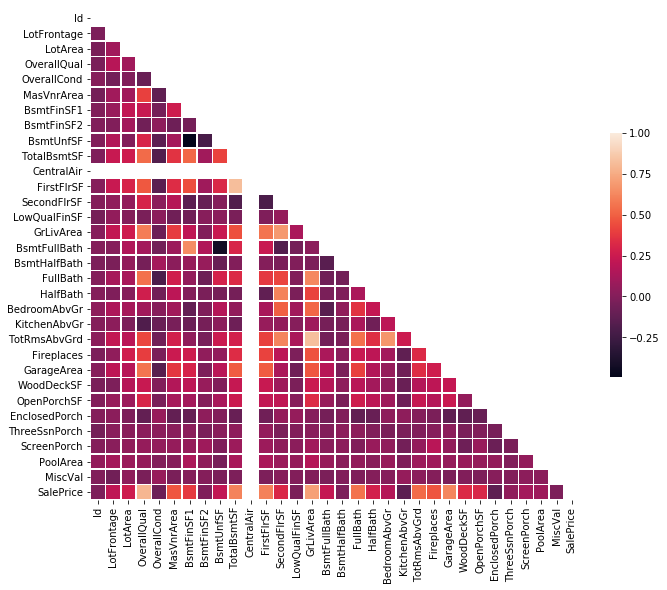

In [18]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, #cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [19]:
# Which predictors are mostly closely correlated with SalePrice?
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
FirstFlrSF       0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
SecondFlrSF      0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
ThreeSsnPorch    0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
CentralAir            NaN
Name: SalePrice, dtype: float64

**Observations:** <br/>
The most highly correlated predictors relate to SalePrice: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, FirstFlrSF. This intuitively makes sense. <br/>
And the least is CentralAir.

**Log Transformation** <br/>
We have already noticed above, that most of the columns are skewed. It can either be positively or negatively skewed.
In order to make variable or distribution normal, we can take Log transformation and then we can fit a model to it.


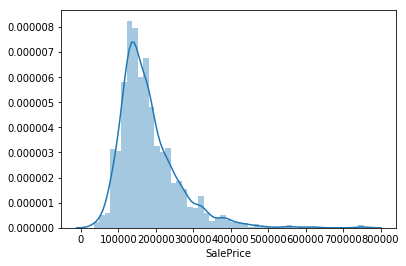

In [20]:
# What's the distribution of prices?
sales_price = data['SalePrice']
graph = sns.distplot(sales_price)

**Observations:**<br/>
If you check Target variable, it is right skewed. Lets do log transformation and check the distribution.    

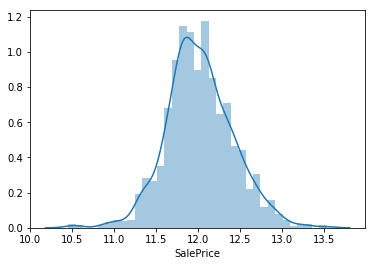

In [21]:
# Let's log-tranform this: 
sales_prices_log = np.log1p(sales_price)
graph = sns.distplot(sales_prices_log)

Now the variable is normally distributed.

In [22]:
# This looks much better, so let's replace the SalePrice with the log-transformed version (will need to exponentiate predictions)
data['SalePrice'] = np.log1p(data['SalePrice'])

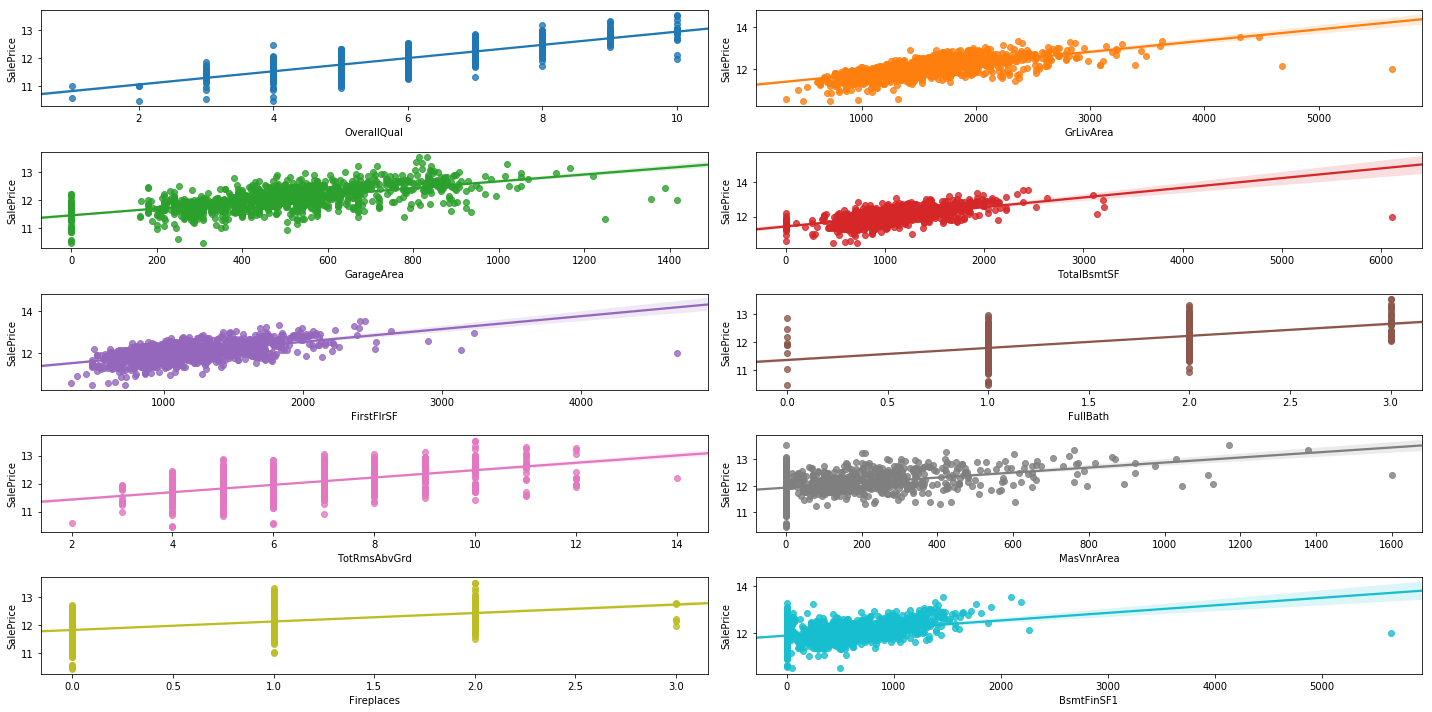

In [23]:
# Let's look at the plots of the important features identified above with SalePrice
fig, axs = plt.subplots(ncols=2, nrows=5, figsize = (20,10))
sns.regplot(x='OverallQual', y='SalePrice', data=data, ax=axs[0,0])
sns.regplot(x='GrLivArea', y='SalePrice', data=data, ax=axs[0,1])
sns.regplot(x='GarageArea',y='SalePrice', data=data, ax=axs[1,0])
sns.regplot(x='TotalBsmtSF',y='SalePrice', data=data, ax=axs[1,1])
sns.regplot(x='FirstFlrSF',y='SalePrice', data=data, ax=axs[2,0])
sns.regplot(x='FullBath',y='SalePrice', data=data, ax=axs[2,1])
sns.regplot(x='TotRmsAbvGrd',y='SalePrice', data=data, ax=axs[3,0])
sns.regplot(x='MasVnrArea',y='SalePrice', data=data, ax=axs[3,1])
sns.regplot(x='Fireplaces',y='SalePrice', data=data, ax=axs[4,0])
sns.regplot(x='BsmtFinSF1',y='SalePrice', data=data, ax=axs[4,1])
fig.tight_layout()

**Observations:**<br/>
Many of these are also skewed to the left, so let's log-transform any variables with a skewness greater than 1

In [24]:
skewed_features = data[floats].apply(lambda x: skew(x.dropna()))
skewed_features = skewed_features[skewed_features > 1]
skewed_features.sort_values(ascending = False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
ThreeSsnPorch    10.293752
LowQualFinSF      9.002080
BsmtFinSF2        4.250888
ScreenPorch       4.117977
EnclosedPorch     3.086696
MasVnrArea        2.674865
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
FirstFlrSF        1.375342
GrLivArea         1.365156
dtype: float64

In [25]:
skewed_features = skewed_features.index

In [26]:
# Now let's log-transform the skewed features
for col in skewed_features:
   data[col] = np.log1p(data[col])

Log transformation of important variables is now done

**Standardization of Numerical variables**

In [27]:
# Standardise numeric features (normalise)
numeric_features = data.loc[:,floats]
numeric_features_st = (numeric_features - numeric_features.mean())/numeric_features.std()

In [28]:
data.loc[:,floats] = numeric_features_st

**Linear Regression**

In [34]:
# For the purposes of a multiple regression, let's use statsmodel rather than scikit learn, as it gives us
# more information, such as p-values, and hence, which regressors are important.
import statsmodels.formula.api as smf

# create a fitted model with the features: 
formula = 'SalePrice ~ ' + ' + '.join(feature_names)
lm = smf.ols(formula=formula, data=data).fit()

# print the coefficients
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     42.95
Date:                Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:52:58   Log-Likelihood:                 1616.3
No. Observations:                1460   AIC:                            -2187.
Df Residuals:                     937   BIC:                             578.2
Df Model:                         522                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.8749      1.726      0.507      0.612      -2.513       4.263
MSSubClass[T.30]            -0.0301      0.030     -1.005      0.315      -0.089       0.029
MSSubClass[T.40]            -0.0512      0.096     -0.535      0.593      -0.239       0.137
MSSubClass[T.45]            -0.2308      0.122     -1.896      0.058      -0.470       0.008
MSSubClass[T.50]            -0.0562      0.048     -1.168      0.243      -0.151       0.038
MSSubClass[T.60]            -0.0654      0.040     -1.631      0.103      -0.144       0.013
MSSubClass[T.70]            -0.0918      0.046     -1.989      0.047      -0.182      -0.001
MSSubClass[T.75]            -0.1101      0.103     -1.073      0.283      -0.312       0.091
MSSubClass[T.80]            -0.0470      0.063     -0.752      0.452      -0.170       0.076
MSSubClass[T.85]            -0.0291      0.057     -0.507      0.613      -0.142       0.083
MSSubClass[T.90]            -0.0196      0.020     -0.981      0.327      -0.059       0.020
MSSubClass[T.120]           -0.0329      0.076     -0.430      0.667      -0.183       0.117
MSSubClass[T.160]           -0.1067      0.091     -1.170      0.242      -0.286       0.072
MSSubClass[T.180]            0.0033      0.100      0.033      0.974      -0.194       0.201
MSSubClass[T.190]            0.4458      0.228      1.953      0.051      -0.002       0.894
MSZoning[T.FV]               0.5427      0.065      8.317      0.000       0.415       0.671
MSZoning[T.RH]               0.4388      0.070      6.299      0.000       0.302       0.575
MSZoning[T.RL]               0.4949      0.058      8.513      0.000       0.381       0.609
MSZoning[T.RM]               0.4488      0.056      7.995      0.000       0.339       0.559
Street[T.Pave]               0.0317      0.067      0.476      0.634      -0.099       0.163
Alley[T.None]               -0.0126      0.025     -0.512      0.609      -0.061       0.036
Alley[T.Pave]               -0.0056      0.035     -0.160      0.873      -0.074       0.063
LotShape[T.IR2]              0.0221      0.021      1.070      0.285      -0.018       0.063
LotShape[T.IR3]              0.0649      0.041      1.594      0.111      -0.015       0.145
LotShape[T.Reg]              0.0106      0.008      1.275      0.203      -0.006       0.027
LandContour[T.HLS]           0.0277      0.028      0.992      0.321      -0.027       0.082
LandContour[T.Low]          -0.0052      0.034     -0.151      0.880      -0.073       0.062
LandContour[T.Lvl]           0.0170      0.021      0.807      0.420      -0.024       0.058
Utilities[T.NoSeWa]         -0.1807      0.135     -1.339      0.181      -0.445       0.084
LotConfig[T.CulDSac]         0.0257      0.016      1.568      0.117      -0.006       0.058
LotConfig[T.FR

In [35]:
# Best features
lm.pvalues.sort_values(ascending = False, inplace=False).tail(10)

RoofMatl[T.Membran]    3.019903e-09
RoofMatl[T.WdShake]    1.105344e-09
MSZoning[T.RH]         4.600486e-10
RoofMatl[T.CompShg]    2.154058e-10
OverallQual            2.514813e-11
RoofMatl[T.WdShngl]    8.196799e-12
MSZoning[T.RM]         3.792733e-15
MSZoning[T.FV]         3.164270e-16
OverallCond            2.332517e-16
MSZoning[T.RL]         6.643398e-17
dtype: float64

**Above and below are the best and worst features of the fit**

In [36]:
# Worst features
lm.pvalues.sort_values(ascending = False, inplace=False).head(10)

GarageYrBlt[T.2002.0]      0.996503
Fence[T.MnWw]              0.992530
GarageYrBlt[T.1978.0]      0.989600
SaleType[T.Oth]            0.986830
GarageYrBlt[T.1956.0]      0.986787
YearRemodAdd[T.1973]       0.986008
Neighborhood[T.BrkSide]    0.983044
YearRemodAdd[T.1981]       0.983017
Electrical[T.Mix]          0.982783
FireplaceQu[T.TA]          0.981953
dtype: float64

**Creating Dummy variables**

In [38]:
# Features - remove the thing we're trying to predict!
features = data.drop('SalePrice', axis = 1)

# Create dummy variables - for each categorical data
features = pd.get_dummies(features)

##Splitting train and test data
train_y = data['SalePrice']
train_x = features

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.4, random_state=101)

# Verify that the number of features has been increased due to the dummy variables:
print('Number of features in original dataset, including categorical fields: ', data.shape[1], 
      '\nNumber of features, including dummy variables for categorical fields: ', X_train.shape[1])

Number of features in original dataset, including categorical fields:  81 
Number of features, including dummy variables for categorical fields:  604


In [39]:
X_train.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
878,879,0.876311,0.509205,5,7,-0.806564,0.859832,-0.355221,-0.808480,0.228291,...,0,0,0,1,0,0,0,0,1,0
1448,1449,0.357045,0.506743,4,7,-0.806564,-1.413655,-0.355221,-0.016386,-0.367316,...,0,0,0,1,0,0,0,0,1,0
241,242,-0.508399,-1.637358,5,9,-0.806564,0.524510,-0.355221,-0.475800,-0.190472,...,0,0,0,1,0,0,0,0,1,0
331,332,0.357045,-0.196930,5,6,-0.806564,0.839547,-0.355221,-0.808480,0.185588,...,0,0,0,1,0,0,0,0,1,0
700,701,0.789767,0.887730,8,5,1.646040,0.976243,-0.355221,-0.093332,0.650720,...,0,0,0,1,0,0,0,0,1,0


### Algorithm Selection <a name='as'></a>

**Ridge regularisation (L2 regularisation)**

In [40]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import mean_squared_error

In [43]:
# Define root-mean-square-error function - use 10-fold cross-validation
# You have to use neg_mean_squared_error because mean_squared_error will be deprecated in future
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return rmse

# Invoke Ridge regularisation
model_ridge = Ridge()

In [44]:
# Tune parameters - the only parameter is alpha - the larger alpha, the larger the penalty for extra predictors
alphas = [0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
# Work out the RMSE for each value of the alphas above: 
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

Text(0,0.5,'RMSE')

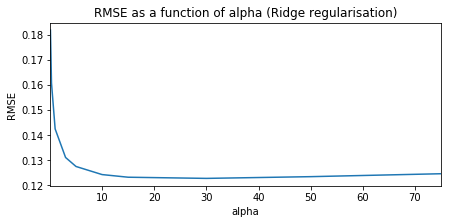

In [45]:
# Let's plot the RMSE as a function of alpha
matplotlib.rcParams['figure.figsize'] = (7,3)
cv_ridge.plot(title = 'RMSE as a function of alpha (Ridge regularisation)')
plt.xlabel('alpha')
plt.ylabel('RMSE')

We want to choose the value of  α  that minimises in the chart above. The extreme cases are  α=0 , which corresponds to no penalty for each extra predictor, and  α→inf  which corresponds to a null model. We want a balance between flexibility and over-fitting, which represents the minimium of this chart.

In [46]:
cv_ridge.min()

0.12280488242465608

This looks like it correpsonds to alpha = 30, so let's fit the model with that.

In [48]:
model_ridge = Ridge(alpha = 30)
model_ridge.fit(X_train, y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5,1,'Important coefficients in the Ridge Model')

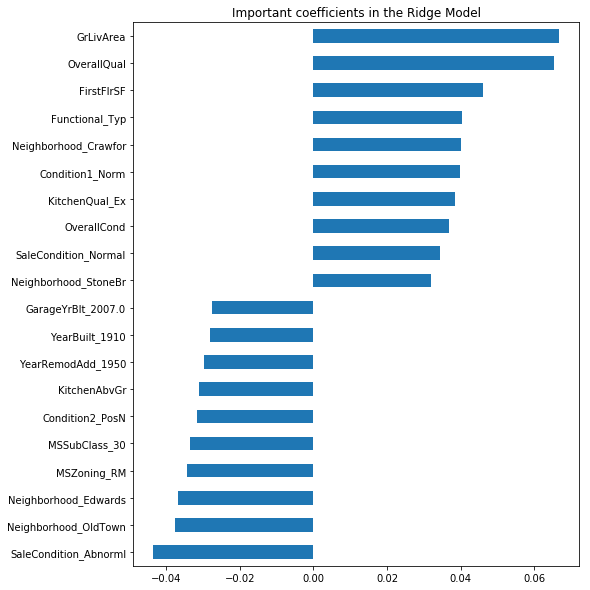

In [49]:
# What are the important coefficients here?
coef_ridge = pd.Series(model_ridge.coef_, index = X_train.columns)
important_coef_ridge = pd.concat([coef_ridge.sort_values().head(10), coef_ridge.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
important_coef_ridge.plot(kind = "barh")
plt.title('Important coefficients in the Ridge Model')

In [50]:
# How many features were eliminated? 
print("Ridge picked " + str(sum(coef_ridge != 0)) + " features and eliminated the other " + str(sum(coef_ridge == 0)) + " features")

Ridge picked 585 features and eliminated the other 19 features


**Note:** <br/>
Ridge reduces the magnitude of coefficients in order to reduce variance. It won't do feature selection since it keeps all the terms. If you see above, it picked almost all the variables. 

In [52]:
#let's look at the residuals as well:
def plot_residuals(model, X_train, y_train):
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    preds = pd.DataFrame({"preds":model.predict(X_train), "true":y_train})
    preds["residuals"] = preds["true"] - preds["preds"]
    preds.plot(x = "preds", y = "residuals",kind = "scatter")

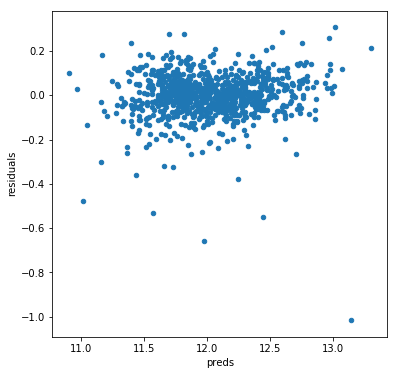

In [53]:
plot_residuals(model_ridge, X_train, y_train)

**This looks pretty good - nicely clustered around 0**

In [55]:
###Predictions
predictions = model_ridge.predict(X_valid)
from sklearn.metrics import r2_score
print("Valid:",r2_score(y_valid,predictions))

Valid: 0.884554114672


In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 0.0850956687396
MSE: 0.0188320681255
RMSE: 0.137229982604


**Lasso regularisation (L1 regularisation)**

**Note:**The advantage of Lasso regularisation is that it performs some feature selection. We'll use Lasso cross-validation to choose the  α  for us.

In [72]:
model_lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1],
                     max_iter = 50000, cv = 10).fit(X_train, y_train)
# Coefficients of each predictor:
coef_lasso = pd.Series(model_lasso.coef_, index = X_train.columns)

Text(0.5,1,'Important coefficients in the Lasso Model')

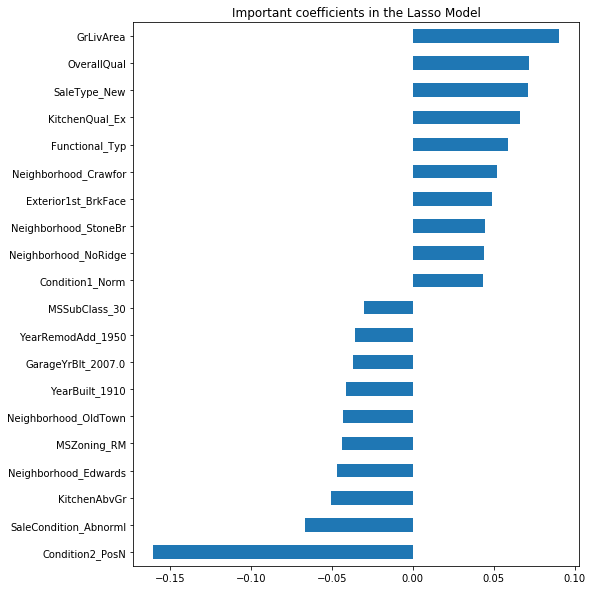

In [73]:
# What are the important coefficients here?
important_coef_lasso = pd.concat([coef_lasso.sort_values().head(10), coef_lasso.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
important_coef_lasso.plot(kind = "barh")
plt.title('Important coefficients in the Lasso Model')

A lot of these are on the list of features picked out by the normal multiple regression without regularisation. 

In [76]:
# How many features were eliminated? 
print("Lasso picked " + str(sum(coef_lasso != 0)) + " features and eliminated the other " + str(sum(coef_lasso == 0)) + " features")

Lasso picked 101 features and eliminated the other 503 features


**Observations:** As we know that Lasso is good for dimensionality reduction or feature selection, you can see the above result. It eliminated 503 features from the model.

**Plotting residuals**

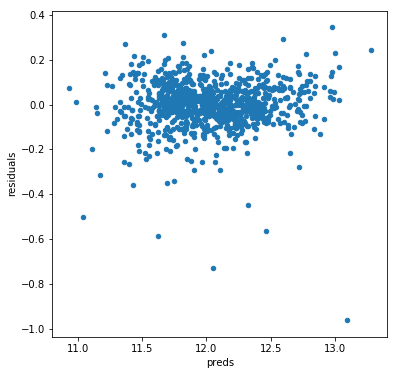

In [78]:
# Let's have a look at the residuals of this too.    
plot_residuals(model_lasso, X_train, y_train)

In [79]:
###Predictions
predictions_lasso = model_lasso.predict(X_valid)
from sklearn.metrics import r2_score
print("Valid:",r2_score(y_valid,predictions_lasso))

###Regression evaluation metrics
print('MAE:', metrics.mean_absolute_error(y_valid, predictions_lasso))
print('MSE:', metrics.mean_squared_error(y_valid, predictions_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions_lasso)))

Valid: 0.884469351089
MAE: 0.0843653576274
MSE: 0.0188458951541
RMSE: 0.137280352396


### Elastic net regularisation

**Note:** <br/>
ElasticNet is hybrid of Lasso and Ridge Regression techniques. It is trained with L1 and L2 prior as regularizer. Elastic-net is useful when there are multiple features which are correlated. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

In [80]:
from sklearn.linear_model import ElasticNetCV
model_elastic = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
model_elastic.fit(X_train, y_train)
alpha = model_elastic.alpha_
ratio = model_elastic.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

Best l1_ratio : 0.1
Best alpha : 0.006


In [81]:
coef_elastic = pd.Series(model_elastic.coef_, index = X_train.columns)

In [82]:
# How many features were eliminated? 
print("Elastic picked " + str(sum(coef_elastic != 0)) + " features and eliminated the other " + str(sum(coef_elastic == 0)) + " features")

Elastic picked 142 features and eliminated the other 462 features


**Plotting residuals**

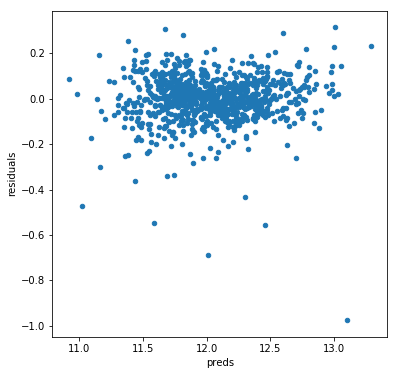

In [83]:
plot_residuals(model_elastic, X_train, y_train)

In [84]:
###Predictions
predictions_elastic = model_elastic.predict(X_valid)
from sklearn.metrics import r2_score
print("Valid:",r2_score(y_valid,predictions_elastic))

###Regression evaluation metrics
print('MAE:', metrics.mean_absolute_error(y_valid, predictions_elastic))
print('MSE:', metrics.mean_squared_error(y_valid, predictions_elastic))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions_elastic)))

Valid: 0.886550465796
MAE: 0.0838893675128
MSE: 0.0185064140732
RMSE: 0.136038281646


### Observations & Conclusions <a name='oc'></a>

Elastic - 0.13603<br/>
Lasso - 0.137280<br/>
Ridge - 0.137229<br/>

If you see the RMSE results of three models, it is clear that all the three models performed well with good accuracy in validation set.